#Bibliotecas


In [ ]:
#Bibliotecas Aqui!
import math
import matplotlib.pyplot as pyplot
import numpy as np
from termcolor import colored, cprint

# Métodos

In [ ]:
#Métodos Aqui!

In [ ]:
#********************************Interpolação - Fórmula de Lagrange**********************************




def lagrange(x, fx, xInterpolator, interpolationGrade):
  printTitle("********************************Interpolação - Fórmula de Lagrange**********************************")

  result = 0

  for i in range(interpolationGrade):
    product = fx[i]

    for j in range(interpolationGrade):      
      if (i != j):
        product *= ((xInterpolator - x[j])/(x[i] - x[j]))

    result += product   
    
  return result 




#********************************Interpolação - Fórmula de Newton**********************************




def newton(x, fx, xInterpolator, interpolationGrade):
  printTitle("********************************Interpolação - Fórmula de Newton**********************************")

  result = 0
  newFx = fx[:interpolationGrade]

  for k in range(interpolationGrade-1):
    for i in range(interpolationGrade-1, k, -1):
      newFx[i] = (newFx[i] - newFx[i-1])/(x[i] - x[i-k-1])

  result = newFx[interpolationGrade-1]

  for i in range(interpolationGrade-2, -1, -1):
    result = result * (xInterpolator - x[i]) + newFx[i]

  return result




#********************************Spline Cúbica Natural**********************************




#Métodos da eliminação de Gauss, do trabalho 2, modificados para uso na Spline Cúbica Natural,
#de forma a impedir operações sobre os valores limites de g, i.e., g[0] e g[n-1], os quais são
#iguais a 0, sendo, assim, um problema para a parte de substituição de Gauss, onde estes seriam
#usados para divisão, resultando em ZeroDivisionError se g fosse usado em sua totalidade na 
#eliminação de Gauss.




def forwardEliminationSpline(numRC, matrix, results):
  multiplicativeFactor = 0

  for k in range(1, numRC-2):
    for i in range(k+1, numRC-1):
      if (matrix[i][k] == 0):
        continue

      #printItem("i: %i, k: %i, matrix[i][k]: %.2f" % 
      #                (i, k, matrix[i][k]))
      
      multiplicativeFactor = matrix[i][k] / matrix[k][k]
      

      for j in range(k, numRC):
        matrix[i][j] = matrix[i][j] - multiplicativeFactor * matrix[k][j]
                 
      results[i] = results[i] - multiplicativeFactor * results[k]

  return matrix, results




def backwardSubstitutionSpline(numRC, matrix, results):
  solutionsX = [0 for i in range(numRC)]
  sumMatrix = 0

  for i in range(numRC-2, 0, -1):
    sumMatrix = 0

    for j in range(i+1, numRC):
      sumMatrix += matrix[i][j] * solutionsX[j];

    solutionsX[i] = (results[i] - sumMatrix) / matrix[i][i];
    
  return solutionsX;




def gaussianEliminationSpline(numRC, matrix, results):
  (matrix, results) = forwardEliminationSpline(numRC, matrix, results)

  return backwardSubstitutionSpline(numRC, matrix, results)




def naturalCubicSpline(x, fx, xInterpolator, numPoints):
  printTitle("********************************Spline Cúbica Natural**********************************")

  a = [0 for i in range(numPoints)]
  b = [0 for i in range(numPoints)] 
  c = [0 for i in range(numPoints)]
  d = [0 for i in range(numPoints)]

  g = [1 for i in range(numPoints)]
  h = [0 for i in range(numPoints-1)]

  for i in range(numPoints-1):
    h[i] = x[i+1] - x[i]


  matrix = [[0 for j in range(numPoints)] for i in range(numPoints)]
  results = [0 for j in range(numPoints)]


  g[0] = 0
  g[numPoints - 1] = 0


  for i in range(1, numPoints-1):

    for j in range(0, numPoints):

      if (j == i - 1):
        matrix[i][j] = h[i-1]*g[i-1]
      elif (j == i):
        matrix[i][j] = 2*(h[i-1] + h[i])
      elif (j == i + 1):
        matrix[i][j] = h[i]*g[i+1]

    results[i] = 6*( ((fx[i+1] - fx[i])/h[i]) - ((fx[i] - fx[i-1])/h[i-1]) )

  #printItem(matrix)
  #printItem(results)
  
  g = gaussianEliminationSpline(numPoints, matrix, results)
  #printItem(g)

  s = [0 for i in range(numPoints)]

  xDiff = 0

  for i in range(1, numPoints):
    a[i] = fx[i]
    b[i] = (fx[i] - fx[i-1])/h[i-1] + (2*h[i-1]*g[i] + g[i-1]*h[i-1])/6
    c[i] = g[i]/2
    d[i] = (g[i] - g[i-1])/(6 * h[i-1])

    xDiff = xInterpolator - x[i]
    s[i] = a[i] + b[i]*(xDiff) + c[i]*(xDiff)**2 + d[i]*(xDiff)**3

    printItem("i=%i: a=%10.5f, b=%10.5f, c=%10.5f, d=%10.5f, S%i=%10.5f" 
                % (i, a[i], b[i], c[i], d[i], i, s[i]))

#********************************Método dos Mínimos Quadrados**********************************




def ceilOrFloor(num):
  return math.ceil(num)+1 if num > 0 else math.floor(num)-1




def definePlotLimits(firstPoint, lastPoint):
   firstPoint = ceilOrFloor(firstPoint)
   lastPoint = ceilOrFloor(lastPoint)

   return firstPoint, lastPoint




def MMQ(x, fx, numPoints, rounding):
  printTitle("********************************Método dos Mínimos Quadrados**********************************")

  sumX = sumFx =  sumX_Fx = sumX2 = 0

  for i in range(numPoints):
    sumX    += x[i]
    sumFx   += fx[i]
    sumX_Fx += round(x[i]*fx[i], rounding)
    sumX2   += round(x[i]*x[i], rounding) 

  sumX = round(sumX, rounding)
  sumFx = round(sumFx, rounding)

  a = round((numPoints*sumX_Fx- sumX*sumFx)/(numPoints*sumX2 - sumX*sumX), rounding)
  b = round((sumX*sumX_Fx- sumFx*sumX2)/(sumX*sumX - numPoints*sumX2), rounding)

  printItem("Sum of x     : %10.7f" % (sumX))
  printItem("Sum of f(x)  : %10.7f" % (sumFx))
  printItem("Sum of x*f(x): %10.7f" % (sumX_Fx))
  printItem("Sum of x²    : %10.7f" % (sumX2))
  printItem("a            : %10.7f" % (a))
  printItem("b            : %10.7f\n\n" % (b))  

  y = lambda a, b, x : a*x + b

  (xStart, xStop) = definePlotLimits(x[0], x[numPoints-1])
  plotMMQ(x, fx, y, a, b, xStart, xStop, 100)

  return y, a, b




def plotMMQ(x, fx, y, a, b, start, stop, simPoints):
  curve = np.linspace(start, stop, simPoints)
  values = [y(a, b, x) for x in curve]

  pyplot.plot(curve, values, linestyle="-")

  pyplot.plot(x, fx, linestyle='none', marker='o', color = 'black')  

  for i in range(len(x)):
    pyplot.text(x[i], fx[i], "(%.2f, %.2f)"%(x[i], fx[i]), color='black', fontweight="bold")

  pyplot.title("1. Representação gráfica de função ajustada por MMQ: y = %.7f*x + %.7f" % (a, b), color='yellow', fontweight='bold')
  pyplot.grid(True)
  pyplot.tick_params(axis='x', colors='yellow')
  pyplot.tick_params(axis='y', colors='yellow')
  pyplot.xlabel('x', color='green', fontweight='bold')
  pyplot.ylabel('f(x)', color='green', fontweight='bold')
  pyplot.show()




def printTitle(title):
  print(colored(title, 'yellow', attrs=['bold'])) 




def printItem(item):
  print(colored(item, 'green'))



# Lista de Exercício 4




###Questão 1 – A tabela seguinte apresenta a velocidade de queda de um paraquedista em função do tempo. 

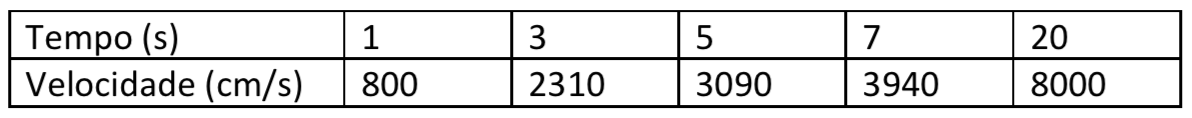

##Estime o valor da velocidade no instante de tempo 10 segundos, utilizando um polinômio interpolador de grau 3.

In [ ]:
time = [1,3,5,7,20]
speed = [800, 2310, 3090, 3940, 8000]

result = lagrange(time, speed, 10, 4)
printItem("\n" + str (result) + "\n\n\n")

result = newton(time, speed, 10, 4)
printItem("\n" + str (result) + "\n\n\n")

result = lagrange(time[1:], speed[1:], 10, 4)
printItem("\n" + str (result) + "\n\n\n")

result = newton(time[1:], speed[1:], 10, 4)
printItem("\n" + str (result) + "\n\n\n")

result = lagrange(time, speed, 10, 5)
printItem("\n" + str (result) + "\n\n\n")

result = newton(time, speed, 10, 5)
printItem("\n" + str (result) + "\n\n\n")

********************************Interpolação - Fórmula de Lagrange**********************************

7096.25



********************************Interpolação - Fórmula de Newton**********************************

7096.25



********************************Interpolação - Fórmula de Lagrange**********************************

5245.803167420815



********************************Interpolação - Fórmula de Newton**********************************

5245.803167420814



********************************Interpolação - Fórmula de Lagrange**********************************

6219.72255298881



********************************Interpolação - Fórmula de Newton**********************************

6219.7225529888065





O valor obtido como resultado foi o mesmo (ou muito próximo) ao aplicar ambas as fórmulas, com x de tempos, f(x) de velocidades, grau de polinômio e x interpolador iguais, o que deve denotar a correta implementação de ambas as fórmulas. 

Contudo, pelo fato do valor limite superior não ter sido considerado nos cálculos da interpolação, sendo assim realizada uma extrapolação para x=10, com o exercício pedindo um polinômio de grau 3 para um conjunto de 5 pontos, i.e., cujo cálculo usa apenas 4 de seus pontos, desconsiderando justamente o único valor x nesse conjunto com valor maior (20 s) ao x interpolador (10 s), a estimativa de f(x) para 10 s parece não ser muito precisa, atingindo f(x) de 10 s (velocidade de 7096,25 cm/s) valor muito próximo a f(x) de 20 s (velocidade de 8000   cm/s). 

Esse equívoco causado pela aplicação de um polinômio não somente de grau inferior(ao máximo grau possível para um determinado número de pontos), mas também com valores de x inferiores ao x alvo utilizados nos cálculos (sendo realizada uma extrapolação e não interpolação) pode ser demonstrado tanto ao utilizarmos um polinômio de grau 4 no exercício 1, i.e., com 5 pontos (máximo grau de polinômio possível para realizar a interpolação desse conjunto de pontos), quanto ao usarmos um polinômio de grau 3 com os valores de x dos 4 últimos pontos, polinômios esses que levarão em conta um x de 20 segundos, com velocidade f(x) de 8000 cm/s, sendo, dessa forma, interpolações para x=10.

Para esse caso, então, para um tempo de 10 s, temos uma velocidade de 6219,72 cm/s ao utilizarmos o polinômio de grau 4 e uma velocidade de 5245,8 cm/s ao utilizarmos o polinômio de grau 3 que inclua x=20. Esses valores, por sua vez, são consideravelmente inferiores àquele encontrado para 10 s fazendo uso de um polinômio de grau 3 com os 4 pontos inferiores e mais próximos do esperado, dado os valores informados por este mesmo conjunto de pontos. É interessante notar, também, como o polinômio de grau 4 parece trazer o valor de f(x) mais preciso, sendo quase uma média dos valores encontrados na extrapolação e interpolação para x=10 com polinômio de grau 3, devendo, assim, ser o resultado mais próximo da realidade para f(x) dados esse conjunto de pontos, justamente por considerar todos os pontos na formulação da f(x).

##Questão 2 – A tabela seguinte apresenta a produção de milho em 6 propriedades agrícolas. A variável x é a área medida em hectare e f(x) é a produção medida em sacas. 
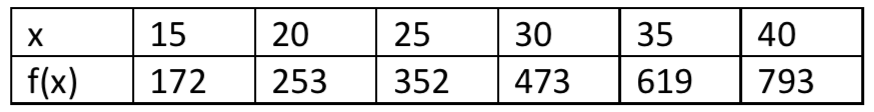
##Estime o valor da produção em 12, 22 e 31 hectares, utilizando um polinômio interpolador de grau 4.

In [ ]:
x = [15, 20, 25, 30, 35, 40]
fx = [172, 253, 352, 473, 619, 793]

result = lagrange(x, fx, 12, 5)
printItem("\n12 hectares: " + str (result) + "\n\n\n")

result = newton(x, fx, 12, 5)
printItem("\n12 hectares: " + str (result) + "\n\n\n")

result = lagrange(x, fx, 22, 5)
printItem("\n22 hectares: " + str (result) + "\n\n\n")

result = newton(x, fx, 22, 5)
printItem("\n22 hectares: " + str (result) + "\n\n\n")

result = lagrange(x, fx, 31, 5)
printItem("\n31 hectares: " + str (result) + "\n\n\n")

result = newton(x, fx, 31, 5)
printItem("\n31 hectares: " + str (result) + "\n\n\n")

********************************Interpolação - Fórmula de Lagrange**********************************

12 hectares: 130.0015999999998



********************************Interpolação - Fórmula de Newton**********************************

12 hectares: 130.00160000000002



********************************Interpolação - Fórmula de Lagrange**********************************

22 hectares: 290.1936



********************************Interpolação - Fórmula de Newton**********************************

22 hectares: 290.1936



********************************Interpolação - Fórmula de Lagrange**********************************

31 hectares: 500.1216000000001



********************************Interpolação - Fórmula de Newton**********************************

31 hectares: 500.1216





No caso da questão 2 aplicamos ambas as fórmulas de Lagrange e Newton  como na questão 1, fazendo uso de um polinômio de grau 4 para um conjunto de par de 6 pontos **(x, f(x))**, onde, aqui, como utilizaremos os 5 primeiros pontos, ignoramos o sexto ponto em x = 40.

Como percebemos, os resultados aqui encontrados para ambas as fórmulas, sendo a elas aplicadas os mesmos argumentos, são ou iguais ou muito próximos, o que tende a denotar a correta implementação dessas fórmulas, assim como ocorreu na questão 1.

Ainda, é possível notar que as estimativas da produção medida em sacas f(x) encontradas aqui para 22 e 31 são bem coerentes com o esperado, dado seus x de área medida em hectares. Essa acuidade nos valores deve ser resultado dessas 2 áreas medidas em hectares x aqui aplicadas estarem entre os valores mínimo(15) e máximo de x(35).

Contudo, como 12 está abaixo do limite mínimo de valores de x utilizados para a interpolação, i.e., é realizada uma extrapolação para x=12, é difícil julgar a precisão de sua estimativa, sendo que aqui não temos mais um ponto com x inferior para compararmos a precisão da f(x) com 12 aplicado entre um valor menor que 12 e 15.

Dito isso, podemos perceber que, possivelmente, em casos onde o x utilizado como base na fórmula se encontra entre os limites mínimo e máximo de x utilizados na construção da interpolação de f(x), o valor dessa f(x) deve tender a ser mais preciso que em casos onde o x base aplicado ultrapassa o limite máximo ou mínimo dos valores de x (extrapolação) utilizados para a formulação do polinômio usado para encontrar sua f(x) correspondente.

##Questão 3 – A resistência de um certo fio de metal, f(x), varia com o diâmetro desse fio, x. Foram medidas as resistência de 5 fios de diversos diâmetros. 
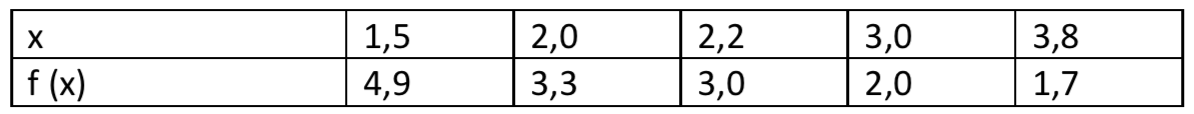
##Estime o valor da resistência de um fio de 1,75 de diâmetro, utilizando spline cúbica natural.

In [ ]:
x = [1.5, 2, 2.2, 3, 3.8]
fx = [4.9, 3.3, 3, 2, 1.7]

naturalCubicSpline(x, fx, 1.75, 5)

********************************Spline Cúbica Natural**********************************
i=1: a=   3.30000, b=  -1.96865, c=   3.69405, d=   2.46270, S1=   3.98456
i=2: a=   3.00000, b=  -1.30151, c=  -0.35837, d=  -6.75403, S2=   4.12857
i=3: a=   2.00000, b=  -0.86028, c=   0.90990, d=   0.52845, S3=   3.46496
i=4: a=   1.70000, b=  -0.13236, c=   0.00000, d=  -0.37913, S4=   5.23756


Como podemos perceber ao visualizar os valores obtidos para cada iteração da spline cúbica natural, a função S1 é a que parece estimar melhor a resistência f(x) para um fio com 1,75 de diâmetro, sendo esse o resultado esperado, pois 1,75 está dentro do intervalo de S1, i.e., de 1,5 a 2,2 de diâmetro para x, intervalo esse para o qual a spline cúbica natural deve interpolar mais precisamente a f(x) quando dado um valor de x igual a 1,75. 

##Questão 4 – Seja dado o conjunto de pontos: 

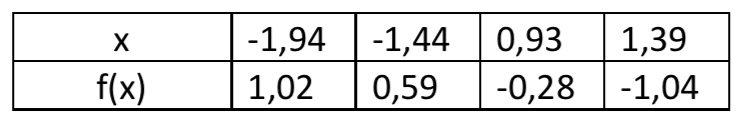

##Encontre a função f(x) = a + b x que melhor se ajusta no sentido de mínimos quadrados aos pontos dados. Então, responda cada item:

1.   Faça um gráfico com os pontos e o esboço da função ajustada.
2.   Encontre o valor de f(1,00).
3.   Encontre o valor de f(0,93).

##Forneça os valores calculados com 7 dígitos significativo por arredondamento.

********************************Método dos Mínimos Quadrados**********************************
Sum of x     : -1.0600000
Sum of f(x)  :  0.2900000
Sum of x*f(x): -4.5344000
Sum of x²    :  8.6342000
a            : -0.5336274
b            : -0.0689113




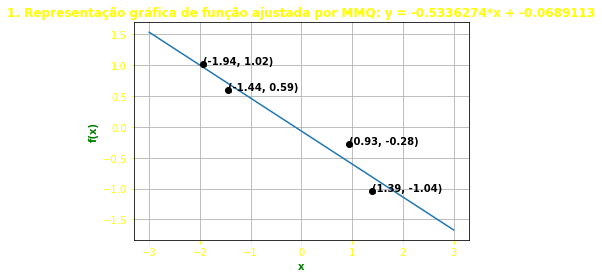



2. f(1.00) = -0.6025387



3. f(0.93) = -0.5651848




In [ ]:
x = [-1.94, -1.44, 0.93, 1.39]
fx = [1.02, 0.59, -0.28, -1.04]

y, a, b = MMQ(x, fx, len(x), 7)

printItem("\n\n2. f(1.00) = %10.7f\n\n" % (y(a, b, 1.00)))
printItem("\n3. f(0.93) = %10.7f\n\n" % (y(a, b, 0.93)))